# 구현 문제

### 1. 1316번 그룹 단어 체커 

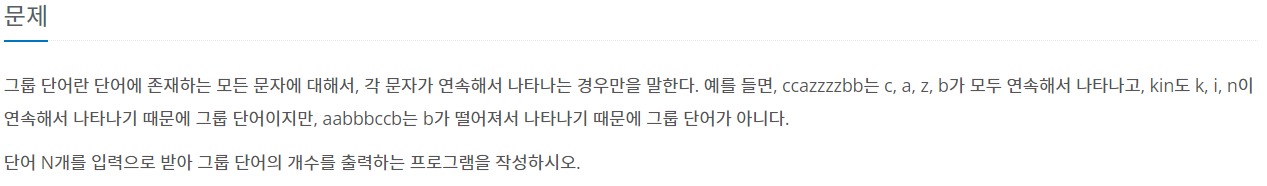

In [97]:
def checker(word):
    alpha = []
    for i in word:
        if i not in alpha:
            alpha.append(i)
        else:
            if alpha[-1] != i:
                return 0
            else:
                alpha.append(i)
    if ''.join(alpha) == word:
        return 1
    
n = int(input())
tot = 0
for i in range(n):
    word = input()
    tot += checker(word)
print(tot)

3
happy
new
year
3


### 2. 12100번 2048 (Easy)

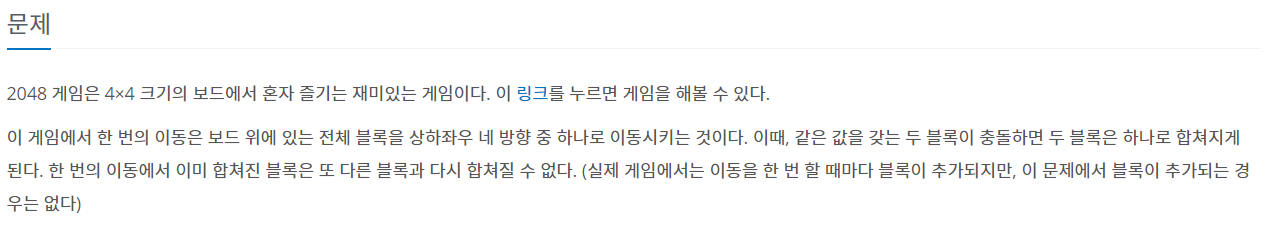

처음 생각한 방법
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FBmWFf%2FbtqDxubxl2d%2F70IOJcKMLWwmXsGzOQV9S1%2Fimg.png" width="350" height="350"/>

코드가 너무 복잡해지는 것 같아 포기하고 찾아본 방법
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc40ApL%2FbtqDupXhZKg%2FiPdGd0B2eHukgHKDjonj0K%2Fimg.png" width="350" height="350"/>

- 블록을 상하좌우로 이동하는 방법이 아닌, 보드를 90도 돌리고 무조건 왼쪽으로 합치는 방법
- dfs : 보드에서 최댓값을 저장하고 convert, rotate함수를 부름
- convert : list에서 같은값이 있다면 왼쪽으로 이동시켜서 합침
- rotate : 보드를 90도 회전시킴

left,right, up, down 중 하나만 구현한 후 Map을 돌린다   
left 후 오른쪽으로 90도 회전하면 up 한 것과 같다   
rotate90 : 오른쪽으로 90도 회전  
convert : 한 행 왼쪽으로 밀기   

 

1. 왼쪽으로 밀고 이전 값과 다르다면  dfs호출 
2. 오른쪽으로 90도 회전 
3. 다시 왼쪽으로 밀고 이전값과 다르다면 재귀함수 호출

계속 반복

left, down, right, up 순서로 반복된다.

In [304]:
from copy import deepcopy

N = int(input())
Board = [list(map(int, input().split())) for _ in range(N)]

def rotate(N, B): # 시계 방향으로 90도 회전
    new_lst = deepcopy(B)
    for i in range(N):
        for j in range(N):
            new_lst[j][N-i-1] = B[i][j]
    return new_lst

def convert(N, B): # 왼쪽으로 합침
    new_lst = [i for i in B if i!=0]    #0을 제외한 list저장
    for i in range(1, len(new_lst)):
        if new_lst[i-1] == new_lst[i]:
            new_lst[i-1] *= 2
            new_lst[i] = 0
    new_lst = [i for i in new_lst if i!=0]
    return new_lst + [0]*(N-len(new_lst))    #list길이만큼 오른쪽에 0추가

def dfs(N, B, count):
    result = max([max(i) for i in B]) # 가장 큰 값
    if count == 0:
        return result
    
    for _ in range(4):
#         print(f"{_+1}번째")
        C = [convert(N, i) for i in B]    #list한줄씩 변환한뒤 합침
#         print(C)
        result = max(result, dfs(N, C, count-1))
        B = rotate(N, B)
#         print(f"B: {B}")
#         print()
    return result

print(dfs(N, Board, 5))

3
2 0 0
2 2 0
2 0 2
8


### 3. 15684번 사다리 조작

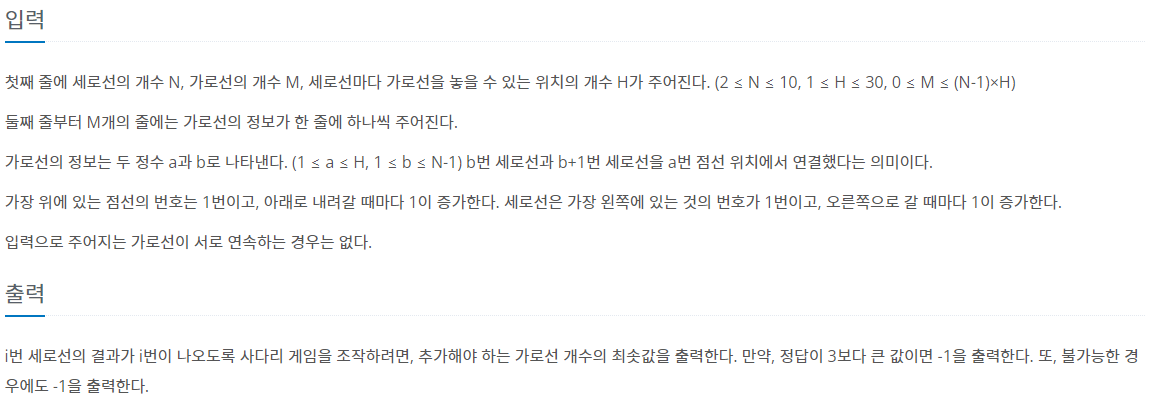

In [303]:
N, M, H = list(map(int, input().split()))

map_list = [[0] * (N-1) for _ in range(H)]
# bridge_list = []

total_move = 999999999

#세팅되어 있는 맵 입력하기
for _ in range(M):
    a, b = list(map(int, input().split()))
    map_list[a-1][b-1] = 1

#1번부터 시작해서 1번에 1번, 2번에 2번 맞나 확인하는 메소드
def go():
    for i in range(N):
        x, y = 0, i #출발 좌표 저장
        orig_y = y #나중에 맞나 비교를 위해 원래 좌표 저장
        while True:
            #down
            x, y = x+1, y
            if x == H+1:
                break
            #check left
            if x-1 >= 0 and y-1 >= 0 and map_list[x-1][y-1] == 1:
                x, y =  x, y-1
                continue
            #check right
            if x-1 >= 0 and y < N-1 and map_list[x-1][y] == 1:
                x, y = x, y+1
                continue
        #도착했는데 안 같다면 
        if orig_y != y:
            return False
    return True

#추가하는 사다리 갯수별로 함수를 돌릴 것이다.
def solution(cnt, start, limit):
    global total_move
    #써야될 사다리 갯수 다 썼을 때
    if cnt == limit:
        #사다리 타봤는데 1번째에 1번이 안나온다면
        if go() == False:
            return False
        #사다리 탔는데 잘 된다면
        else:
            #최솟값만 골라내기 위해
            if total_move > limit:
                total_move = limit
            return True
    
    #그전에 다리를 놓으면서 재귀 들어갔던 행부터 시작
    for i in range(start, H):
        #열의 마지막까지 돌면서
        for j in range(N-1):
            #다리가 이미 놓아져있다면
            if map_list[i][j] == 1:
                continue
            #다리가 안 놓아져있는데
            if map_list[i][j] == 0:
                #그 왼쪽에 다리가 놓아져있어
                if j-1 >= 0 and map_list[i][j-1] == 1:
                    continue
                #그 오른쪽에 다리가 놓아져있어
                if j+1 <= N-2 and map_list[i][j+1] == 1:
                    continue
            #나의 맵에다가 1을 넣어주고(다리가 놓여져있다)
            map_list[i][j] = 1
            #다리를 마지막으로 놨던 행부터 다시 시작
            if solution(cnt+1, i, limit):
                return True
            #백트래킹의 방법
            map_list[i][j] = 0

#다리 0개부터 돌려보자
for i  in range(4):
    flag = solution(0, 0, i)
    if flag:
        break
    
if total_move == 999999999:
    print("-1")
else:
    print(total_move)

2 0 3
0
